# Data Cleaning and Exploratory Data Analysis

In [30]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from janitor import clean_names

sns.set_theme()  # plotting theme

## Data Cleaning and Basic Statistics

In [57]:
# last modified 09/09/2024 7:01AM
raw_data = gpd.read_file('data/raw_data.geojson')

In [64]:
# preview data
raw_data.head()

,animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,intake_date,intake_cond,intake_type,...,outcome_type,outcome_subtype,latitude,longitude,intake_is_dead,outcome_is_dead,was_outcome_alive,intake_duration,is_current_month,geometry
0,A668536,LUCKY,DOG,BLACK,WHITE,Male,2012-12-29,2021-12-26,NORMAL,STRAY,...,RETURN TO OWNER,WALKIN,33.873055,-118.152245,Alive on Intake,FALSE,1,3.0,0,POINT (-118.15225 33.87305)
1,A688134,*CANARY,CAT,GRAY TABBY,None,Female,2017-11-07,2022-11-07,INJURED SEVERE,STRAY,...,RESCUE,STRAYCATAL,33.873055,-118.152245,Alive on Intake,FALSE,1,16.0,0,POINT (-118.15225 33.87305)
2,A668537,ROXY,DOG,BLACK,WHITE,Female,2012-12-29,2021-12-26,NORMAL,STRAY,...,RETURN TO OWNER,WALKIN,33.873055,-118.152245,Alive on Intake,FALSE,1,3.0,0,POINT (-118.15225 33.87305)
3,A605848,NO NAME,CAT,BLACK,None,Male,2011-04-06,2018-04-06,ILL SEVERE,CONFISCATE,...,EUTHANASIA,ILL SEVERE,33.872790,-118.179213,Alive on Intake,TRUE,0,2.0,0,POINT (-118.17921 33.87279)
4,A605853,ASTERIA,CAT,TORTIE,None,Female,2010-04-19,2018-04-06,ILL SEVERE,CONFISCATE,...,TRANSFER,SPCALA,33.872790,-118.179213,Alive on Intake,FALSE,1,141.0,0,POINT (-118.17921 33.87279)


In [65]:
# number of obs and columns/vars
raw_data.shape

(32674, 25)

In [66]:
# info on dataframe
raw_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32674 entries, 0 to 32673
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   animal_id          32674 non-null  object        
 1   animal_name        19270 non-null  object        
 2   animal_type        32674 non-null  object        
 3   primary_color      32674 non-null  object        
 4   secondary_color    15544 non-null  object        
 5   sex                32674 non-null  object        
 6   dob                28586 non-null  datetime64[ms]
 7   intake_date        32674 non-null  datetime64[ms]
 8   intake_cond        32674 non-null  object        
 9   intake_type        32674 non-null  object        
 10  intake_subtype     32242 non-null  object        
 11  reason             2192 non-null   object        
 12  outcome_date       32372 non-null  datetime64[ms]
 13  crossing           32674 non-null  object        
 14

In [67]:
# descriptive stats (exluding NA values)
raw_data.describe()

,dob,intake_date,outcome_date,latitude,longitude,was_outcome_alive,intake_duration
count,28586,32674,32372,32674.000000,32674.000000,32674.000000,32372.000000
mean,2018-10-31 00:31:29.036000,2021-02-19 03:19:33.410000,2021-02-23 07:11:55.729000,33.815488,-118.152746,0.797178,19.198505
min,1967-11-26 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,27.411825,-122.695911,0.000000,0.000000
25%,2016-09-02 00:00:00,2018-10-10 00:00:00,2018-10-19 00:00:00,33.783871,-118.191014,1.000000,0.000000
50%,2019-02-28 00:00:00,2020-12-10 00:00:00,2020-12-03 00:00:00,33.806909,-118.173446,1.000000,5.000000
75%,2022-04-06 18:00:00,2023-06-22 00:00:00,2023-06-25 00:00:00,33.851173,-118.129393,1.000000,17.000000
max,2025-09-02 00:00:00,2025-09-09 00:00:00,2025-09-08 00:00:00,45.521885,-73.992360,1.000000,1386.000000
std,NaN,NaN,NaN,0.101852,0.428554,0.402107,48.075210


In [68]:
# save cleaned names for later use
column_names = raw_data.columns

In [69]:
# map 'intake_is_dead' to integers (0 or 1)
raw_data['intake_is_dead'] = raw_data['intake_is_dead'].mask(
    raw_data['intake_is_dead'] == 'Alive on Intake', 0
)

In [72]:
raw_data = raw_data.astype(
    {
        'intake_is_dead': 'bool',
        'was_outcome_alive': 'bool',
        'is_current_month': 'bool',
        'animal_type': 'category',
        'primary_color': 'category',
        'secondary_color': 'category',
        'sex': 'category',
        'intake_cond': 'category',
        'intake_type': 'category',
        'intake_subtype': 'category',
        'reason': 'category',
        'jurisdiction': 'category',
        'outcome_type': 'category',
        'outcome_subtype': 'category',
    }
)

In [76]:
raw_data.dtypes

animal_id                    object
animal_name                  object
animal_type                category
primary_color              category
secondary_color            category
sex                        category
dob                  datetime64[ms]
intake_date          datetime64[ms]
intake_cond                category
intake_type                category
intake_subtype             category
reason                     category
outcome_date         datetime64[ms]
crossing                     object
jurisdiction               category
outcome_type               category
outcome_subtype            category
latitude                    float64
longitude                   float64
intake_is_dead                 bool
outcome_is_dead              object
was_outcome_alive              bool
intake_duration             float64
is_current_month               bool
geometry                   geometry
dtype: object

In [77]:
# make copy of (now) cleaned data
data = raw_data.copy()

In [78]:
# number of unique values per column
for col in data.columns:
    print('{0}: {1}'.format(col, data[col].nunique()))

animal_id: 31524
animal_name: 9732
animal_type: 10
primary_color: 82
secondary_color: 49
sex: 5
dob: 6032
intake_date: 3144
intake_cond: 17
intake_type: 12
intake_subtype: 23
reason: 56
outcome_date: 3126
crossing: 17059
jurisdiction: 26
outcome_type: 18
outcome_subtype: 258
latitude: 10084
longitude: 9982
intake_is_dead: 1
outcome_is_dead: 2
was_outcome_alive: 2
intake_duration: 395
is_current_month: 1
geometry: 10336


In [79]:
data.dtypes

animal_id                    object
animal_name                  object
animal_type                category
primary_color              category
secondary_color            category
sex                        category
dob                  datetime64[ms]
intake_date          datetime64[ms]
intake_cond                category
intake_type                category
intake_subtype             category
reason                     category
outcome_date         datetime64[ms]
crossing                     object
jurisdiction               category
outcome_type               category
outcome_subtype            category
latitude                    float64
longitude                   float64
intake_is_dead                 bool
outcome_is_dead              object
was_outcome_alive              bool
intake_duration             float64
is_current_month               bool
geometry                   geometry
dtype: object

In [81]:
# unique values for outcome type
data['outcome_type'].cat.categories

Index(['ADOPTION', 'COMMUNITY CAT', 'DIED', 'DISPOSAL', 'DUPLICATE',
       'EUTHANASIA', 'FOSTER', 'FOSTER TO ADOPT', 'HOMEFIRST', 'MISSING',
       'RESCUE', 'RETURN TO OWNER', 'RETURN TO RESCUE',
       'RETURN TO WILD HABITAT', 'SHELTER, NEUTER, RETURN', 'TRANSFER',
       'TRANSPORT', 'TRAP, NEUTER, RELEASE'],
      dtype='object')

In [26]:
# percentage of missing values per column
for col in data.columns:
    print('{0}: {1}'.format(col, (data[col].isna().sum() / data.shape[0])))

animal_id: 0.0
animal_name: 0.41023443716716657
animal_type: 0.0
primary_color: 0.0
secondary_color: 0.5242700618228561
sex: 0.0
dob: 0.12511477015363898
intake_date: 0.0
intake_cond: 0.0
intake_type: 0.0
intake_subtype: 0.01322152169921038
reason: 0.9329130195262288
outcome_date: 0.009242823039725775
crossing: 0.0
jurisdiction: 3.060537430372773e-05
outcome_type: 0.009579482157066782
outcome_subtype: 0.10843484115810736
latitude: 0.0
longitude: 0.0
intake_is_dead: 0.0
outcome_is_dead: 0.0
was_outcome_alive: 0.0
intake_duration: 0.009242823039725775
is_current_month: 0.0
geometry: 0.0


In [28]:
# num of animals per type
data['animal_type'].value_counts()

animal_type
CAT           15391
DOG           10703
BIRD           2350
WILD           1531
OTHER          1527
RABBIT          616
REPTILE         365
GUINEA PIG      182
LIVESTOCK         8
AMPHIBIAN         1
Name: count, dtype: int64

## Visual EDA

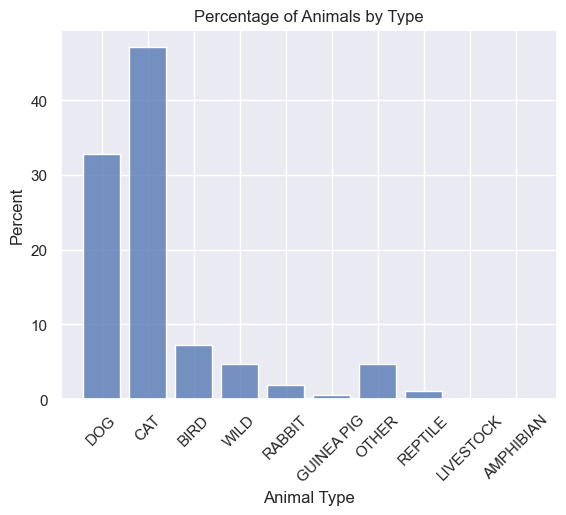

In [42]:
g = sns.histplot(data, x='animal_type', discrete=True, shrink=0.8, stat='percent')
g.set_xlabel('Animal Type')
g.set_title('Percentage of Animals by Type')
g.tick_params(axis='x', rotation=45)

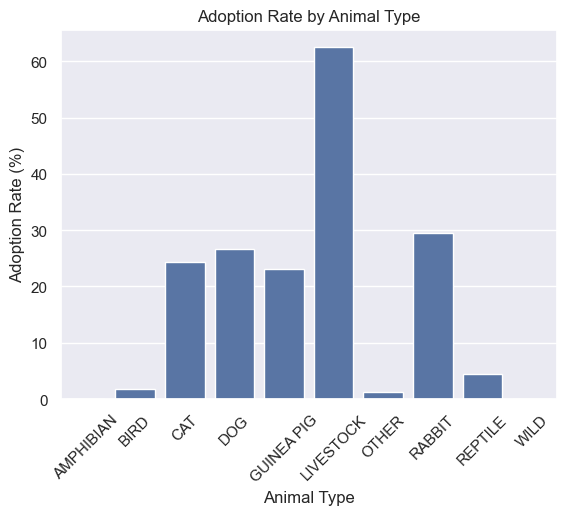

In [98]:
# filter only adopted outcomes
adopted = data[data['outcome_type'] == 'ADOPTION']

# adopted animals grouped by animal type
adopted_grouped = adopted.groupby(by=['animal_type'], observed=False)

# all animals grouped by animal type
animals_grouped = data.groupby(by=['animal_type'], observed='False')

# adoption rates
adoption_rates = (adopted_grouped.size() / animals_grouped.size()).reset_index(
    name='adoption_rate'
)

# adoption rates to percentages
adoption_rates['adoption_rate'] = adoption_rates.adoption_rate.mul(100)

# plot
g = sns.barplot(adoption_rates, x='animal_type', y='adoption_rate')
g.set_xlabel('Animal Type')
g.set_ylabel('Adoption Rate (%)')
g.set_title('Adoption Rate by Animal Type')
g.tick_params(axis='x', rotation=45)

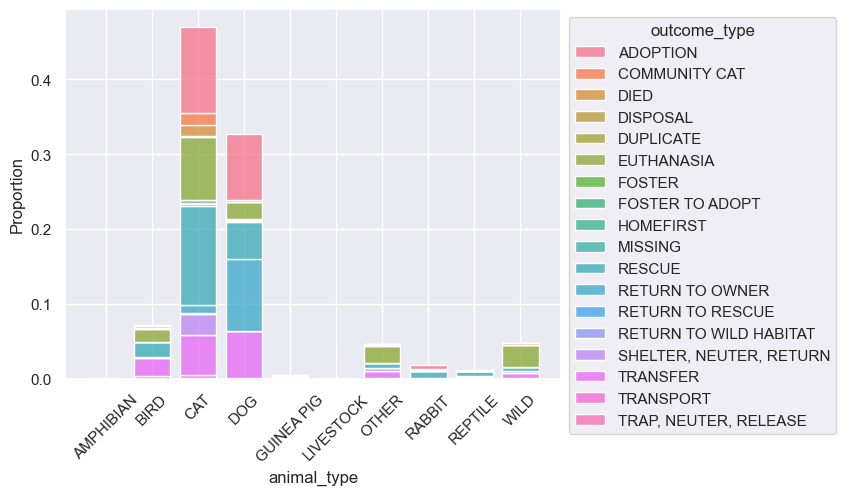

In [128]:
g = sns.histplot(
    data,
    x='animal_type',
    hue='outcome_type',
    discrete=True,
    multiple='stack',
    stat='proportion',
    shrink=0.8,
    legend=True,
)
g.tick_params(axis='x', rotation=45)
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))

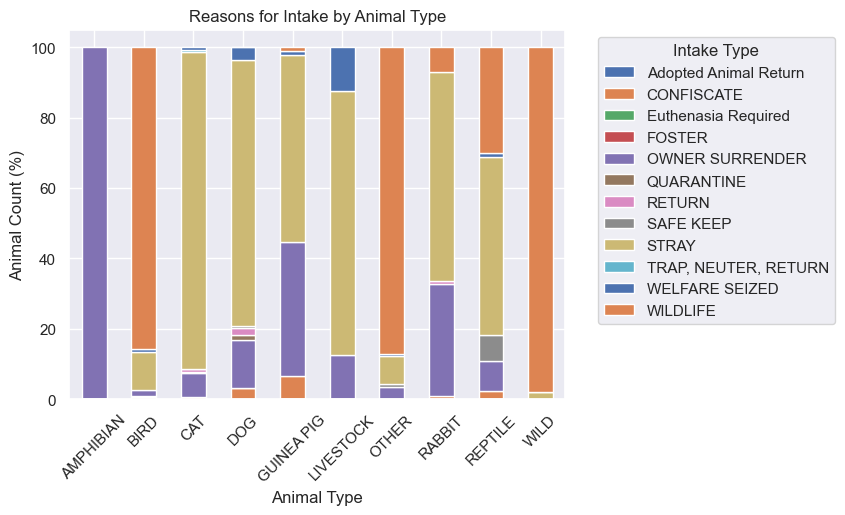

In [141]:
# intake type by animal type
grouped = data.groupby(by=['animal_type', 'intake_type'], observed=True).agg(
    {'animal_id': 'count'}
)
pivot = grouped.reset_index().pivot(
    columns='intake_type', index='animal_type', values='animal_id'
)
percentages = pivot.div(pivot.sum(axis=1), axis=0) * 100

# plot
ax = percentages.plot(kind='bar', stacked=True)
ax.set_title('Reasons for Intake by Animal Type')
ax.set_xlabel('Animal Type')
ax.set_ylabel('Animal Count (%)')
ax.legend(title='Intake Type', bbox_to_anchor=(1.05, 1), loc="upper left")
ax.tick_params('x', rotation=45)
plt.show()